# $\zeta$-Space of Extreme events
------------------------------------------------
This notebook is an example of the $\zeta$-space application over a synthetic Endogenous and Exogenous event. More information about the p-model is presented in [this article](https://proceedings.sbmac.emnuvens.com.br/sbmac/article/view/2874)

In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Zeta-Space/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space/ to /tmp/pip-req-build-ivgbhar0
  Running command git clone -q https://github.com/rsautter/Zeta-Space/ /tmp/pip-req-build-ivgbhar0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=9314 sha256=f23e33af694313860d4155b80160c9b468712b1bba046dd4e5b1e5fd9e9b9b7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-nc7g21a9/wheels/a4/d7/18/7c110a72b8b1a7ee9bbf36d1bd76aa54dd16b165ffe2599af8
Successfully built zetaSpace


In [ ]:
import zeta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

# 1. Generating Endogenous and Exogenous events
-------------------------------------------------------------------

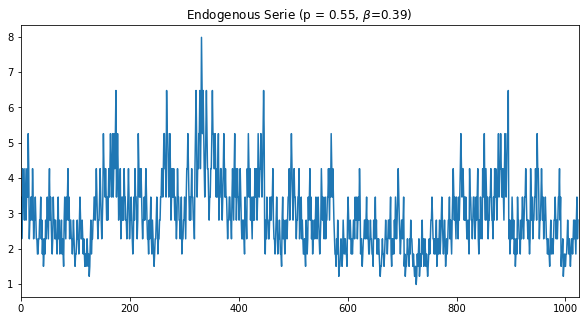

In [ ]:
endo, p, beta = zeta.generateUniformEndo(2**10)
p,beta = np.round(p,2),np.round(beta,2)
plt.figure(figsize=(10,5))
plt.plot(endo/np.std(endo))
plt.title(r"Endogenous Serie (p = "+str(p)+r", $\beta$="+str(beta)+")")
plt.xlim(0,len(endo))
plt.show()

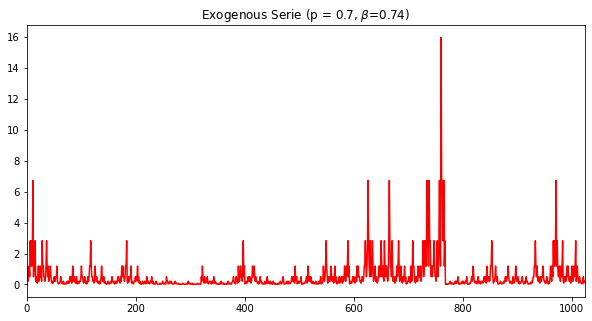

In [ ]:
exo, p, beta = zeta.generateUniformExo(2**10)
p,beta = np.round(p,2),np.round(beta,2)
plt.figure(figsize=(10,5))
plt.plot(exo/np.std(exo),color='red')
plt.title(r"Exogenous Serie (p = "+str(p)+r", $\beta$="+str(beta)+")")
plt.xlim(0,len(exo))
plt.show()

# 2. Power Spectrum and Singularity Spectrum
-----------------------------------------------------------------

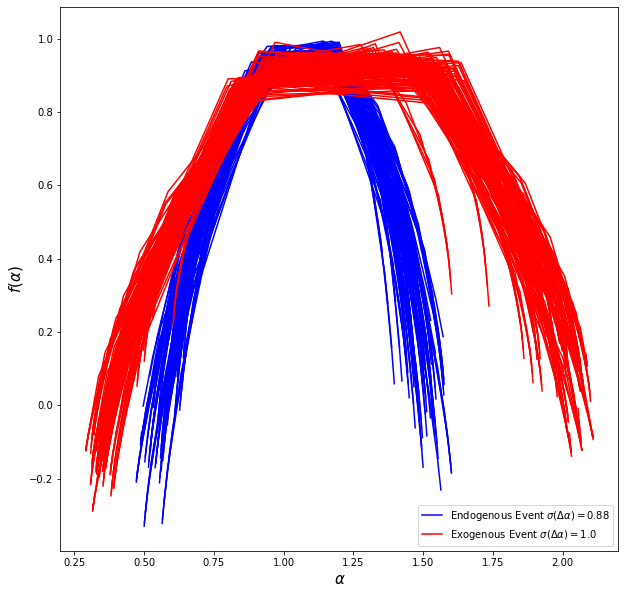

In [ ]:
bas, bfas, w  = zeta.autoMFDFA(endo)
xbas, xbfas, xw  = zeta.autoMFDFA(exo)

plt.figure(figsize=(10,10))
for i in range(len(bas)):
  if i==0:
    plt.plot(bas[i],bfas[i],color='b',label=r"Endogenous Event $\sigma(\Delta \alpha )=$"+str(np.round(w,2)))
  else:
    plt.plot(bas[i],bfas[i],color='b')
for i in range(len(xbas)):
  if i == 0:
    plt.plot(xbas[i],xbfas[i],color='r',label=r"Exogenous Event $\sigma(\Delta \alpha )=$"+str(np.round(xw,2)))  
  else:
    plt.plot(xbas[i],xbfas[i],color='r')
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)
plt.legend()
plt.show()

In [ ]:
print("Endo:")
print(zeta.zetaSpace(endo))
print("Exo:")
print(zeta.zetaSpace(exo))

Endo:
{'GQQ': 0.32671925051291073, 'LDA': 0.8850969243803465}
Exo:
{'GQQ': 0.719362776855747, 'LDA': 0.9952127639033065}


# $\zeta$-space plot
---------------------------------------------------------------

In [ ]:
nSeries = 200
zEndo,zExo = [],[]

for i in tqdm.tqdm(range(nSeries)):
  exo, p, beta = zeta.generateUniformExo(2**13)
  endo, p, beta = zeta.generateUniformEndo(2**13)
  zEndo.append(zeta.zetaSpace(endo,nsamples=10))
  zExo.append(zeta.zetaSpace(exo,nsamples=10))

zExo = pd.DataFrame(zExo)
zEndo = pd.DataFrame(zEndo)

100%|██████████| 200/200 [07:35<00:00,  2.28s/it]


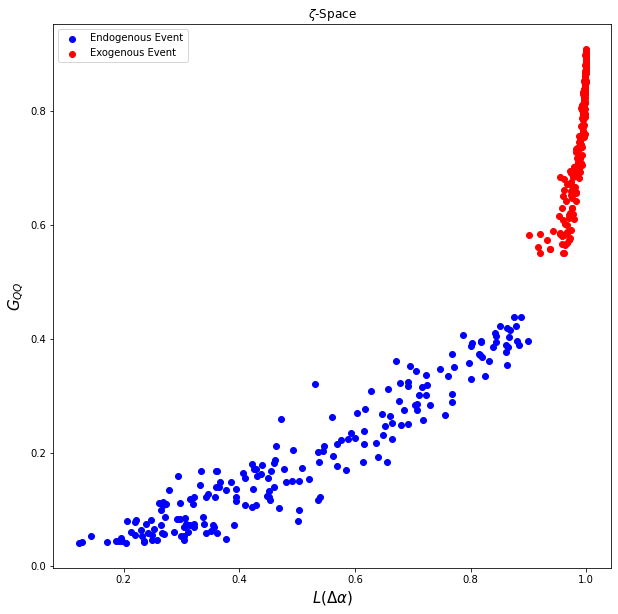

In [ ]:
plt.figure(figsize=(10,10))
plt.title(r"$\zeta$-Space")
plt.scatter(zEndo['LDA'], zEndo['GQQ'],color='blue',label="Endogenous Event")
plt.scatter(zExo['LDA'], zExo['GQQ'],color='red',label="Exogenous Event")
plt.xlabel(r"$L (\Delta \alpha)$",fontsize=15)
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.legend()
plt.show()

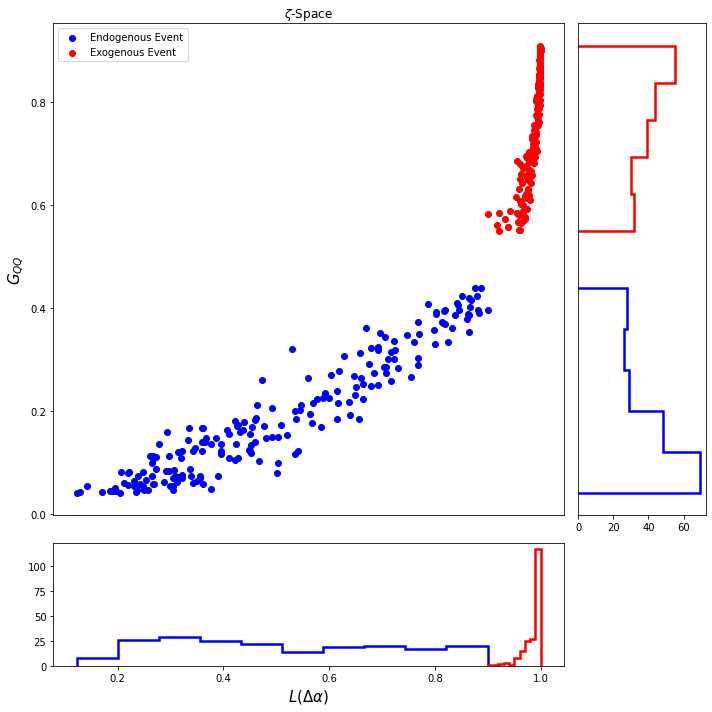

In [ ]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(10,10))

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1])

plt.subplot(gs[0,0])
plt.title(r"$\zeta$-Space")
plt.scatter(zEndo['LDA'], zEndo['GQQ'],color='blue',label="Endogenous Event")
plt.scatter(zExo['LDA'], zExo['GQQ'],color='red',label="Exogenous Event")
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.xticks([])
plt.legend()

plt.subplot(gs[0,1])
plt.hist(zEndo['GQQ'],color='b',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(zExo['GQQ'],color='r',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.yticks([])

plt.subplot(gs[1,0])
plt.hist(zEndo['LDA'],color='b',histtype='step',lw=2.5)
plt.hist(zExo['LDA'],color='r',histtype='step',lw=2.5)
plt.xlabel(r"$L (\Delta\alpha)$",fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
zExo.to_csv("zExo.csv")
zEndo.to_csv("zEndo.csv")

# Testing Logistic K-parameter
-------------------------------------------------

In order to determine the best values of $k$ (following Equation). We measure the variance of a set of extreme events. The greater the variation, the better is $k$.

$$L(\Delta \alpha)= {1 \over 1+e^{k(0.5-\Delta \alpha)}}$$

In [ ]:
ks = [2,3,4,5,6,7,8]
nSample = 128
stds = []
stdEndo = []
avgDistance = []
for k in ks:
  lst = []
  lstEndo = []
  for n in tqdm.tqdm(range(nSample)):
    exo, p, beta = zeta.generateUniformExo(2**10)
    endo, p, beta = zeta.generateUniformEndo(2**10)
    _, _, xw  = zeta.autoMFDFA(exo,magnify=k)
    _, _, nw  = zeta.autoMFDFA(endo,magnify=k)
    lst.append(xw)
    lstEndo.append(nw)
  stds.append(np.std(lst))
  stdEndo.append(np.std(lstEndo))
  avgDistance.append((np.average(lst)-np.average(lstEndo))**2 )
result = pd.DataFrame({"K":ks, "stdExo":stds,"stdEndo":stdEndo,"avgDistance":avgDistance})
result

In [ ]:
result["avgDistance"].apply(lambda x: np.average(x))

0    0.358031
1    0.440682
2    0.465449
3    0.453400
4    0.501011
5    0.452969
6    0.418100
Name: avgDistance, dtype: float64

In [ ]:
result

,K,stdExo,stdEndo,HarmnucMean,HarmcMean
0,2,0.065409,0.100741,0.079318,0.054860
1,3,0.043809,0.148831,0.067693,0.042026
2,4,0.022082,0.188211,0.039527,0.021932
3,5,0.017249,0.232039,0.032111,0.017201
4,6,0.010042,0.259429,0.019335,0.010034
5,7,0.005824,0.262036,0.011394,0.005822
6,8,0.005126,0.305509,0.010084,0.005126


In [ ]:
result.to_csv("k-Test.csv")

# Finding Extreme boundaries

Endogenous finder

In [ ]:
maxSteps = 200
endog = []
for i in tqdm.tqdm(range(maxSteps)):
  endo, p, beta = zeta.generateUniformEndo(2**13)
  res = zeta.zetaSpace(endo,nsamples=10)
  newItem = {"LDA":res["LDA"],"GQQ":res["GQQ"],"serie":endo,"p":p}
  endog.append(newItem)
endog = pd.DataFrame(endog)

100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


In [ ]:
endog

,LDA,GQQ,serie,p
0,0.481900,0.206479,"[2.954486833401783, 2.032343723500634, 2.03234...",0.592458
1,0.315834,0.049809,"[1.0382854950474842, 1.1826413814351204, 0.911...",0.532499
2,0.294838,0.069657,"[0.7287537388528664, 0.6105127456648272, 0.511...",0.544144
3,0.493144,0.189247,"[1.978507475901963, 1.3887395744752424, 1.3887...",0.587574
4,0.433879,0.143711,"[0.7477811755570736, 1.0059121459458633, 0.555...",0.573596
...,...,...,...,...
195,0.596559,0.266359,"[0.10093017034933521, 0.06498915268163041, 0.1...",0.608309
196,0.770901,0.327072,"[2.3417139303942847, 1.4156566328347926, 2.341...",0.623232
197,0.661880,0.261059,"[0.10435292478186067, 0.16114973523600087, 0.1...",0.606961
198,0.722060,0.272264,"[0.9066190024352276, 0.5801281698065244, 1.416...",0.609800


In [ ]:
endog.to_pickle("EndogenousTable.pkl")

In [ ]:
maxSteps = 200
exog = []
for i in tqdm.tqdm(range(maxSteps)):
  endo, p, beta = zeta.generateUniformExo(2**13)
  res = zeta.zetaSpace(endo,nsamples=10)
  newItem = {"LDA":res["LDA"],"GQQ":res["GQQ"],"serie":endo,"p":p}
  exog.append(newItem)
exog = pd.DataFrame(exog)

100%|██████████| 200/200 [04:05<00:00,  1.23s/it]


In [ ]:
exog

,LDA,GQQ,serie,p
0,0.996010,0.823637,"[0.7595261727422583, 2.347268236527657, 0.2457...",0.755527
1,0.999301,0.885656,"[0.003088621632044609, 0.011256358147179991, 0...",0.784690
2,0.940078,0.562819,"[0.28382953650651277, 0.5989497759358102, 0.59...",0.678482
3,0.997812,0.817584,"[0.7775920466466164, 0.2549083601979853, 0.254...",0.753115
4,0.991521,0.714763,"[0.061848746805547535, 0.1578642923821938, 0.0...",0.718502
...,...,...,...,...
195,0.999626,0.908974,"[0.4467495735387381, 1.775337490891766, 7.0550...",0.798950
196,0.997312,0.824159,"[0.07917859318638273, 0.24497593031366968, 0.2...",0.755738
197,0.999400,0.891501,"[0.5213365693044774, 0.1402349234564526, 0.140...",0.788028
198,0.998645,0.879108,"[0.0035182091238873713, 0.000985923996809336, ...",0.781107


In [ ]:
exog.to_pickle("ExogenousTable.pkl")